In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier


In [13]:
Trained_Images_Path = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/test"
Test_Images_Path = "/content/drive/MyDrive/CVPR/CIFAR-10-images-master/Evaluate"

Trained_Image_Folders = os.listdir(Trained_Images_Path)
Trained_Images = []

# Load all training imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Trained_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Trained_Images.append((img_arr_flat, Trained_Image_Folders.index(x)))

random.shuffle(Trained_Images)
# Prepare X and Y for training data
X = [item[0] for item in Trained_Images]
Y = [item[1] for item in Trained_Images]



100%|██████████| 1000/1000 [00:02<00:00, 370.69it/s]


In [14]:
Test_data = []

# Load all testing imgaes and converted to grayscale
for x in Trained_Image_Folders:
    path = os.path.join(Test_Images_Path, x)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Test_data.append((img_arr_flat, Trained_Image_Folders.index(x)))
random.shuffle(Test_data)

100%|██████████| 15/15 [00:00<00:00, 355.69it/s]


In [15]:
# Initialize a list to store the results
manhattan_avg_accuracy_results = []
euclidean_avg_accuracy_results = []

# Define a range of K values to experiment with
k_values = [1, 3, 5, 7, 9]

# Perform 5-fold cross-validation for each K value using Manhattan and Euclidean distances
for k in tqdm(k_values):
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # Manhattan distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)  # Euclidean distance

    # Perform cross-validation for both distance metrics
    kfold = KFold(n_splits=5)  # Define the cross-validation method
    scores_manhattan = cross_val_score(knn_manhattan, X, Y, cv=kfold)
    scores_euclidean = cross_val_score(knn_euclidean, X, Y, cv=kfold)

    manhattan_avg_accuracy_results.append(np.mean(scores_manhattan))
    euclidean_avg_accuracy_results.append(np.mean(scores_euclidean))

100%|██████████| 5/5 [08:12<00:00, 98.43s/it]


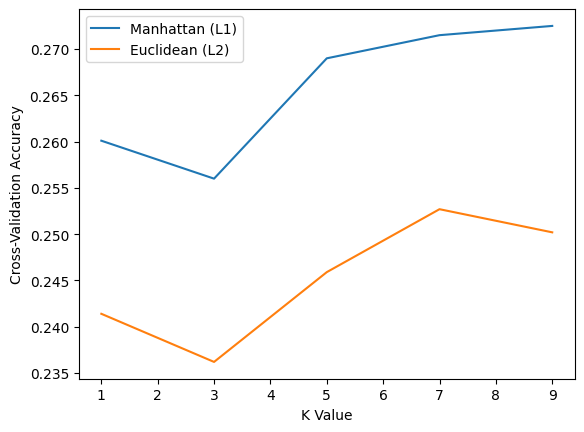

In [16]:
# Plot the results
plt.plot(k_values, manhattan_avg_accuracy_results, label='Manhattan (L1)')
plt.plot(k_values, euclidean_avg_accuracy_results, label='Euclidean (L2)')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

In [17]:
# Discussion:

# The code implementation successfully demonstrates the application of the k-NN algorithm for image classification on the CIFAR-10 dataset.
# The use of cross-validation ensures robust evaluation, while the visualization of results facilitates a clear understanding of the impact of different hyperparameters on the model's performance.
# The performance of Manhattan (L1) and Euclidean (L2) distances based on the average accuracy values obtained from the 5-fold cross-validation is around 28% and 25% sequentially. This model predicted correct image everytime on first prediction. However, later predictions are not correct.
# Images was converted to gray scale for faster processing.
# The code primarily relies on basic image preprocessing techniques, such as grayscale conversion and resizing. More advanced feature engineering methods, such as edge detection,
# texture extraction, or deep feature learning, could potentially improve the discriminative power of the model.
# Although the grayscale conversion reduces computational complexity, the 1D flattening of the images may lead to information loss.
# Generating additional training data through techniques could help improve the model's generalization and robustness, especially when dealing with limited datasets.

0it [00:00, ?it/s]

Originial Image 1: 9
Top 5 Predictions:
1: Class 9
2: Class 9
3: Class 5
4: Class 5
5: Class 4




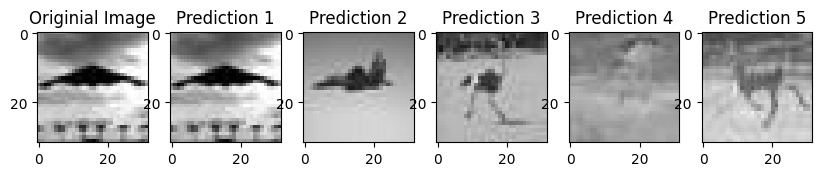

1it [00:00,  1.25it/s]

Originial Image 2: 6
Top 5 Predictions:
1: Class 6
2: Class 2
3: Class 1
4: Class 6
5: Class 2




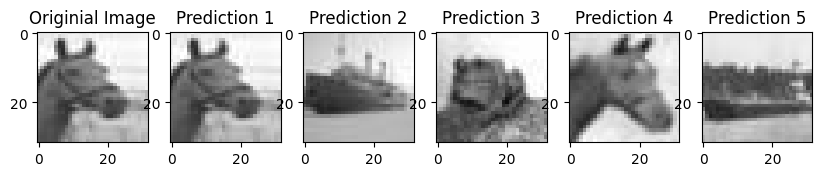

2it [00:01,  1.26it/s]

Originial Image 3: 4
Top 5 Predictions:
1: Class 4
2: Class 6
3: Class 3
4: Class 0
5: Class 5




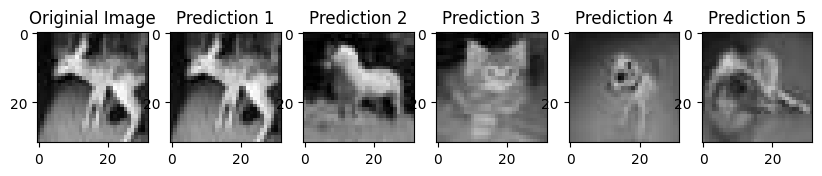

3it [00:02,  1.26it/s]

Originial Image 4: 0
Top 5 Predictions:
1: Class 0
2: Class 0
3: Class 5
4: Class 5
5: Class 9




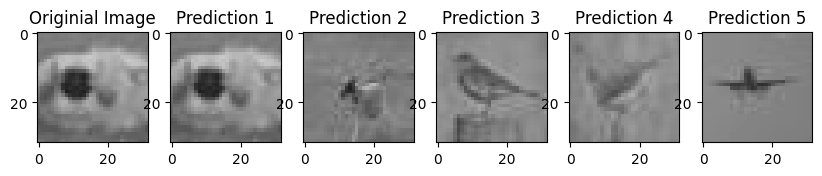

4it [00:03,  1.14it/s]

Originial Image 5: 3
Top 5 Predictions:
1: Class 3
2: Class 4
3: Class 4
4: Class 5
5: Class 4




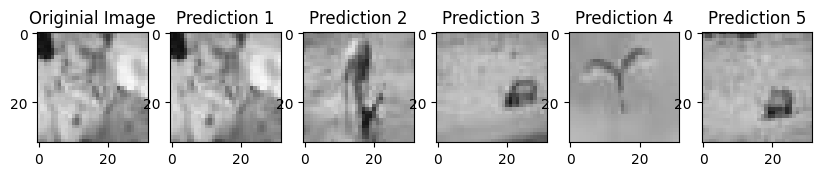

5it [00:04,  1.19it/s]

Originial Image 6: 7
Top 5 Predictions:
1: Class 7
2: Class 6
3: Class 7
4: Class 7
5: Class 1




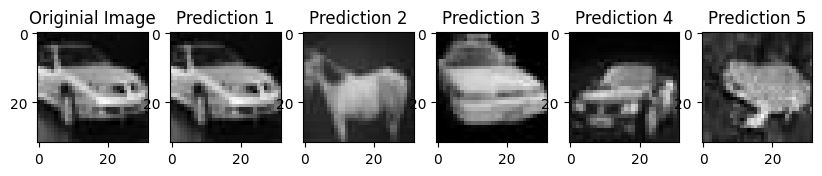

6it [00:04,  1.23it/s]

Originial Image 7: 5
Top 5 Predictions:
1: Class 5
2: Class 4
3: Class 9
4: Class 5
5: Class 9




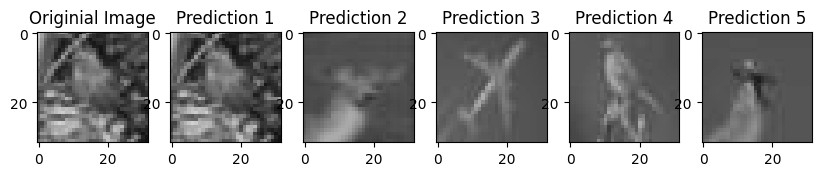

7it [00:05,  1.23it/s]

Originial Image 8: 8
Top 5 Predictions:
1: Class 8
2: Class 2
3: Class 0
4: Class 4
5: Class 1




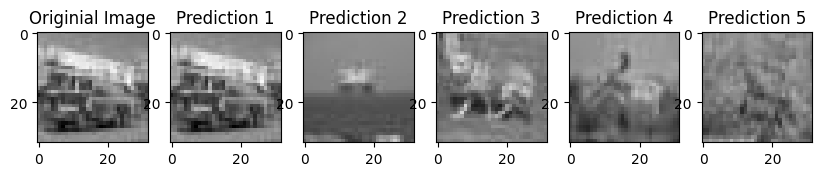

8it [00:06,  1.25it/s]

Originial Image 9: 8
Top 5 Predictions:
1: Class 8
2: Class 5
3: Class 6
4: Class 2
5: Class 3




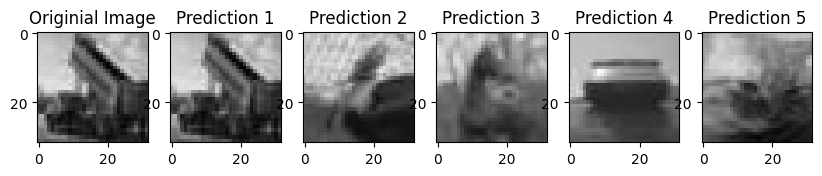

9it [00:07,  1.15it/s]

Originial Image 10: 3
Top 5 Predictions:
1: Class 3
2: Class 5
3: Class 0
4: Class 5
5: Class 1




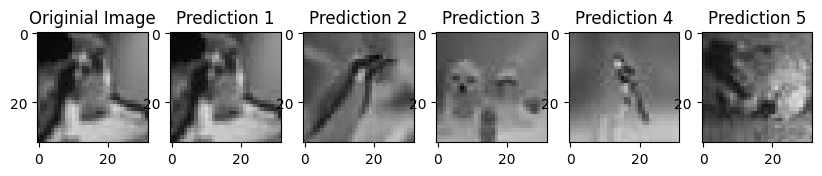

9it [00:08,  1.07it/s]


In [21]:
from numpy.ma.core import count
Z = [item[0] for item in Test_data]
test_images = np.array(Z)

k_values = [1, 3, 5, 7, 9]
# Make predictions using the trained k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
  # Replace with the best hyperparameters
knn_model.fit(X, Y)
predictions = knn_model.predict(test_images)

# Display the top 5 predictions for each test image
count = 0 # GitHub cannot handle the load of total test data images. This a limitations(10 images) have been set.
for i, test_img in tqdm(enumerate(Test_data)):
    print(f"Originial Image {i + 1}: {test_img[1]}")
    print("Top 5 Predictions:")
    distances, indices = knn_model.kneighbors([test_images[i]], n_neighbors=5)
    for j, index in enumerate(indices[0]):
        print(f"{j + 1}: Class {Y[index]}")
    print("\n")

    # Display the test image and its top predictions
    plt.figure(figsize=(10,4))
    plt.subplot(1, 6, 1)
    plt.title("Originial Image")
    original_image = test_img[0].reshape(32,32)

    # Display the original image
    plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    for j, index in enumerate(indices[0]):
        plt.subplot(1, 6, j + 2)
        plt.title(f"Prediction {j + 1}")
        # Reshape the flattened image back to (128, 128)
        original_image = X[index].reshape(32,32)
        # Display the original image
        plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)  # Set the correct vmin and vmax values
    plt.show()

    count += 1
    if(count>9):break